In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json, os, keras
import seaborn as sns
import pandas as pd
dir_outputs = 'outputs/'
dir_test = '../data/features_extraction/test/'

Using TensorFlow backend.


### Learning curves

In [2]:
def plot_learning_curve(models_to_compare, metric='loss', val=True):
    plt.figure(figsize=(10,3))
    colors = list(mcolors.BASE_COLORS.values())
    for i, model in enumerate(models_to_compare):
        history = json.load(open(dir_outputs+model+'.json', 'r'))
        epochs = range(1, len(history[metric])+1)
        plt.plot(epochs, history[metric], label=str(model)+' (Train)', color=colors[i])
        if val:
            plt.plot(epochs, history['val_'+metric], label=str(model)+' (Val)', color=colors[i],
                     linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.title('Learning curves by model input features.')
    plt.grid(True)

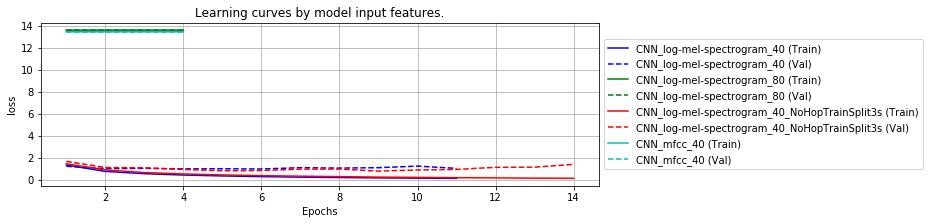

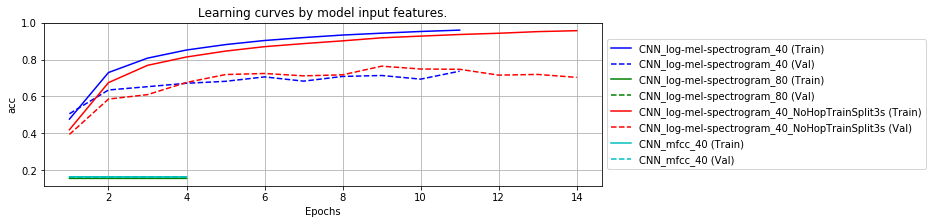

In [3]:
models_to_compare = ['CNN_log-mel-spectrogram_40',
                     'CNN_log-mel-spectrogram_80',
                     'CNN_log-mel-spectrogram_40_NoHopTrainSplit3s',
                     'CNN_mfcc_40']
plot_learning_curve(models_to_compare, metric='loss', val=True)
plot_learning_curve(models_to_compare, metric='acc', val=True)

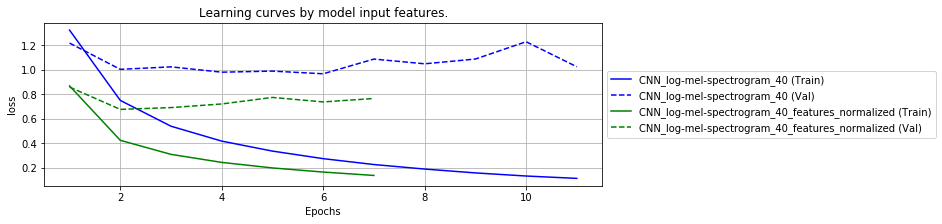

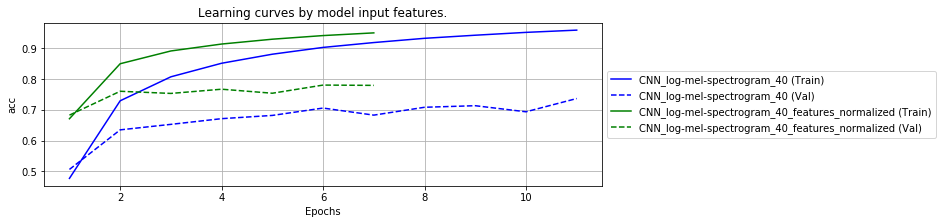

In [4]:
models_to_compare = ['CNN_log-mel-spectrogram_40','CNN_log-mel-spectrogram_40_features_normalized']
plot_learning_curve(models_to_compare, metric='loss', val=True)
plot_learning_curve(models_to_compare, metric='acc', val=True)

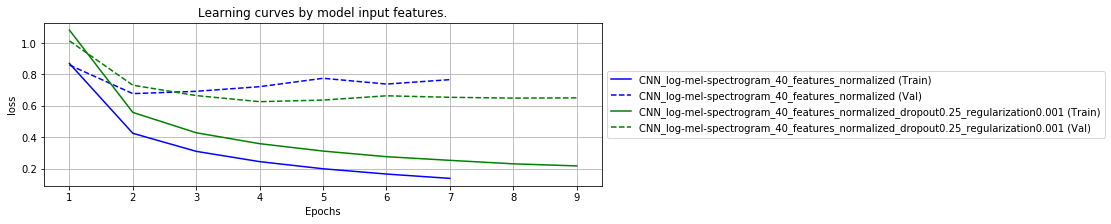

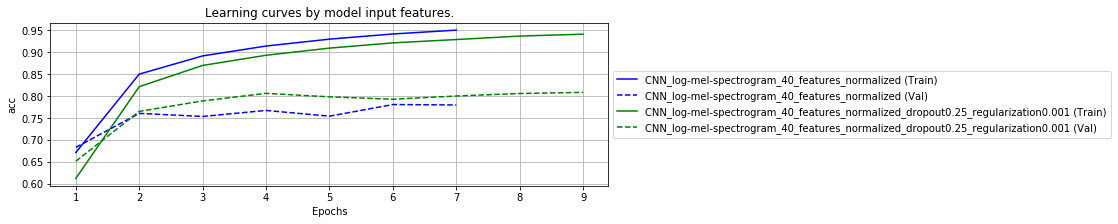

In [5]:
models_to_compare = ['CNN_log-mel-spectrogram_40_features_normalized',
                     'CNN_log-mel-spectrogram_40_features_normalized_dropout0.25_regularization0.001']
plot_learning_curve(models_to_compare, metric='loss', val=True)
plot_learning_curve(models_to_compare, metric='acc', val=True)

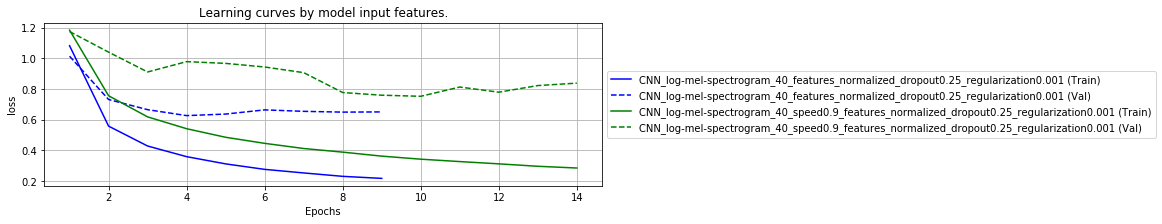

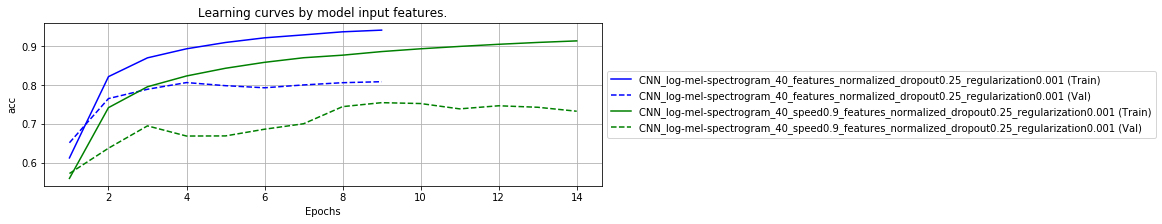

In [6]:
models_to_compare = ['CNN_log-mel-spectrogram_40_features_normalized_dropout0.25_regularization0.001',
                     'CNN_log-mel-spectrogram_40_speed0.9_features_normalized_dropout0.25_regulariz0.001']
plot_learning_curve(models_to_compare, metric='loss', val=True)
plot_learning_curve(models_to_compare, metric='acc', val=True)

### Confussion matrix

In [7]:
def confusion_matrix_test(model_path, dir_test, title):
    # Load test features and targets
    test_labels = np.loadtxt('../data/test_labels.txt', dtype=str)
    x_test, y_test = [], []
    for filename in os.listdir(dir_test):
        features = np.load(dir_test+filename)
        if 'features_normalized' in model_path:
            means = np.mean(features, axis=0)
            stds = np.std(features, axis=0)
            features = (features-means)/stds
        x_test.append(features)
        y_test.append(test_labels[np.where(test_labels[:,0]==filename.replace('.npy', '.wav'))[0][0],1])
    x_test, y_test = np.array(x_test), np.array(y_test)
    languages = {'estonian':0,'farsi':1,'german':2,'kabyle':3,'mandarin':4,'spanish':5}
    y_test = [languages[y] for y in y_test]
    
    # Load model and predict test
    model = keras.models.load_model(model_path)
    prediction_test = model.predict(x_test).argmax(axis=1)
    
    # Compute the accuracy
    acc = np.mean(prediction_test==y_test)
    
    # Compute the confussion matrix table
    K = 6
    N = len(y_test)
    cross = np.zeros(shape=(K,K))
    for i in range(K):
        for j in range(K):
            cross[i,j] = np.sum([y_test[x]==i and prediction_test[x]==j for x in range(N)])
    cross = pd.DataFrame(data=cross.astype(int), columns=list(languages.keys()),
                         index=list(languages.keys()))
    cross= cross/cross.sum(axis=1)
    
    # Plot the confusion matrix
    plt.figure()
    sns.heatmap(cross, cbar=False, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title('Test acc='+str('%.2f'%(acc*100))+str('% ')+model_path.split('/')[-1].replace('.h5', ''))

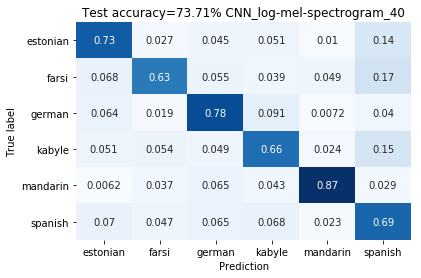

In [15]:
confusion_matrix_test(dir_outputs+'CNN_log-mel-spectrogram_40.h5',
                      dir_test+'log-mel-spectrogram_40/',
                      title='CNN_log-mel-spectrogram_40')

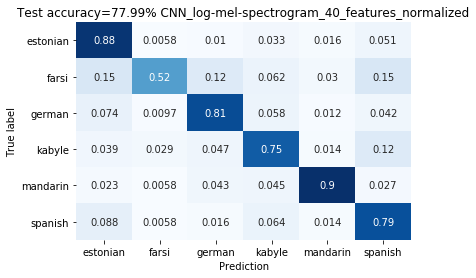

In [16]:
confusion_matrix_test(dir_outputs+'CNN_log-mel-spectrogram_40_features_normalized.h5',
                      dir_test+'log-mel-spectrogram_40/',
                      title='CNN_log-mel-spectrogram_40_features_normalized')

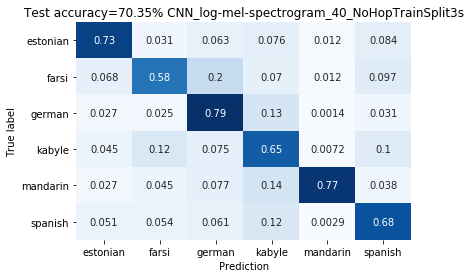

In [17]:
confusion_matrix_test(dir_outputs+'CNN_log-mel-spectrogram_40_NoHopTrainSplit3s.h5',
                      dir_test+'log-mel-spectrogram_40/',
                      title='CNN_log-mel-spectrogram_40_NoHopTrainSplit3s')

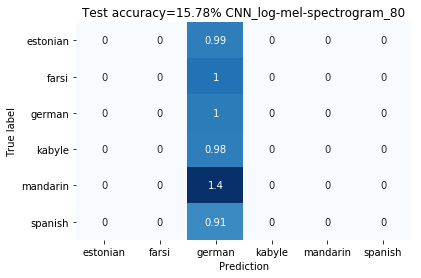

In [18]:
confusion_matrix_test(dir_outputs+'CNN_log-mel-spectrogram_80.h5',
                      dir_test+'log-mel-spectrogram_80/',
                      title='CNN_log-mel-spectrogram_80')

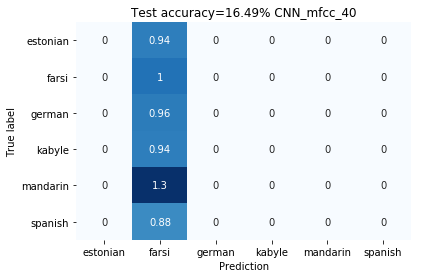

In [19]:
confusion_matrix_test(dir_outputs+'CNN_mfcc_40.h5',
                      dir_test+'mfcc_40/',
                      title='CNN_mfcc_40')

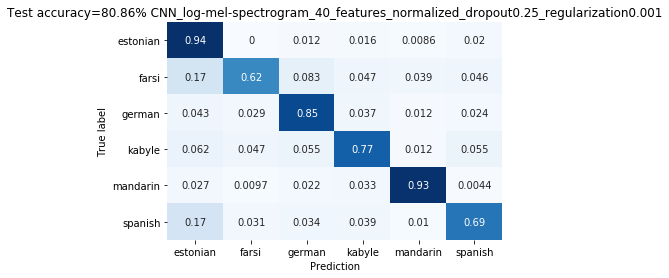

In [6]:
confusion_matrix_test(
    dir_outputs+'CNN_log-mel-spectrogram_40_features_normalized_dropout0.25_regularization0.001.h5',
    dir_test+'log-mel-spectrogram_40/',
    title='CNN_log-mel-spectrogram_40_features_normalized__dropout0.25_regularization0')